In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

maindir = '/Users/max/Library/CloudStorage/OneDrive-Personal/mcook/esiil/Public-Observing-Unci-Maka/'

In [20]:
fp = os.path.join(maindir,'tools/STELLA/STELLA-Q2_data_20250910-0.csv')
stella = pd.read_csv(fp)
stella.head()

,iso8601_utc,UID,batch,measurement_number,decimal_hour,gain,integration_time_ms,wavelength_nm,irradiance_uw.per.cm.sq_factory_cal,irradiance.uncertainty_uw.per.cm.sq_factory_cal,raw_counts,detector_chip_number,detector_chip_temperature_C,battery_voltage,battery_percentage
0,20250910T051247Z,3860,0,0,5.21305,16,168,410,550.014,66.0017,777,3,24,3.8675,62.2
1,20250910T051247Z,3860,0,0,5.21305,16,168,435,749.906,89.9886,835,3,24,3.8675,62.2
2,20250910T051247Z,3860,0,0,5.21305,16,168,460,1137.490,136.4990,1332,3,24,3.8675,62.2
3,20250910T051247Z,3860,0,0,5.21305,16,168,485,1175.080,141.0100,1377,3,24,3.8675,62.2
4,20250910T051247Z,3860,0,0,5.21305,16,168,510,917.225,110.0670,1531,3,24,3.8675,62.2


In [21]:
stella.columns

Index(['iso8601_utc', ' UID', ' batch', ' measurement_number', ' decimal_hour',
       ' gain', ' integration_time_ms', ' wavelength_nm',
       ' irradiance_uw.per.cm.sq_factory_cal',
       ' irradiance.uncertainty_uw.per.cm.sq_factory_cal', ' raw_counts',
       ' detector_chip_number', ' detector_chip_temperature_C',
       ' battery_voltage', ' battery_percentage'],
      dtype='object')

In [22]:
# Clean up column names (strip spaces if needed)
stella.columns = stella.columns.str.strip()
df = stella[stella['batch']]
# Extract wavelength and irradiance
wavelength = stella['wavelength_nm']
irradiance = stella['irradiance_uw.per.cm.sq_factory_cal']

# Make the plot
plt.figure(figsize=(10,6))
plt.plot(wavelength, irradiance, color="forestgreen", lw=1.5)

plt.title("STELLA Field Spectrum", fontsize=14)
plt.xlabel("Wavelength (nm)", fontsize=12)
plt.ylabel("Irradiance ($\mu W \cdot cm^{-2}$)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/var/folders/lm/1zg27k9x385csjv9gkj8jqm80000gp/T/ipykernel_1451/3678109484.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Irradiance ($\mu W \cdot cm^{-2}$)", fontsize=12)
/var/folders/lm/1zg27k9x385csjv9gkj8jqm80000gp/T/ipykernel_1451/3678109484.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Irradiance ($\mu W \cdot cm^{-2}$)", fontsize=12)


KeyError: "None of [Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,\n       ...\n       14, 14, 14, 14, 14, 14, 14, 14, 14, 14],\n      dtype='int64', length=1458)] are in the [columns]"

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/lm/1zg27k9x385csjv9gkj8jqm80000gp/T/ipykernel_1451/1329792664.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Mean Irradiance ($\mu W \cdot cm^{-2}$)")


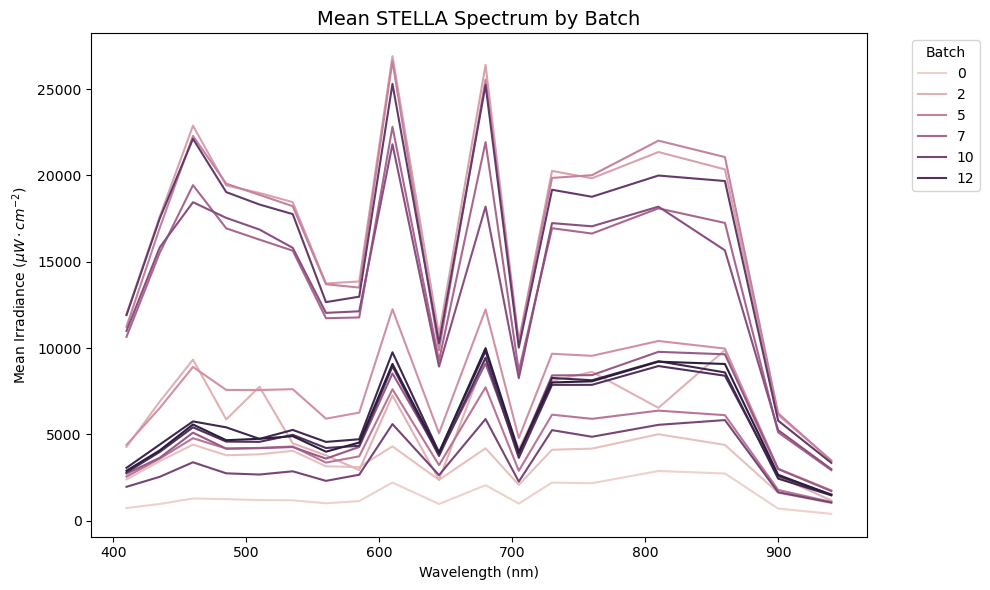

In [11]:
import seaborn as sns

# Compute mean irradiance for each batch at each wavelength
mean_spectra = (
    stella
    .groupby(["batch", "wavelength_nm"], as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=mean_spectra,
    x="wavelength_nm",
    y="irradiance_uw.per.cm.sq_factory_cal",
    hue="batch"
)
plt.title("Mean STELLA Spectrum by Batch", fontsize=14)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Mean Irradiance ($\mu W \cdot cm^{-2}$)")
plt.legend(title="Batch", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
stella['batch'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [15]:
stella[stella['batch'] == 3].head()

,iso8601_utc,UID,batch,measurement_number,decimal_hour,gain,integration_time_ms,wavelength_nm,irradiance_uw.per.cm.sq_factory_cal,irradiance.uncertainty_uw.per.cm.sq_factory_cal,raw_counts,detector_chip_number,detector_chip_temperature_C,battery_voltage,battery_percentage
810,20250910T054802Z,3860,3,0,5.80055,16,168,410,12412.0,1489.44,15597,3,36,3.8775,63.4
811,20250910T054802Z,3860,3,0,5.80055,16,168,435,18229.4,2187.52,19038,3,36,3.8775,63.4
812,20250910T054802Z,3860,3,0,5.80055,16,168,460,23229.2,2787.50,24864,3,36,3.8775,63.4
813,20250910T054802Z,3860,3,0,5.80055,16,168,485,19864.8,2383.77,22458,3,36,3.8775,63.4
814,20250910T054802Z,3860,3,0,5.80055,16,168,510,19258.7,2311.04,24685,3,36,3.8775,63.4


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/var/folders/lm/1zg27k9x385csjv9gkj8jqm80000gp/T/ipykernel_1451/3271678168.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Mean Irradiance ($\mu W \cdot cm^{-2}$)")


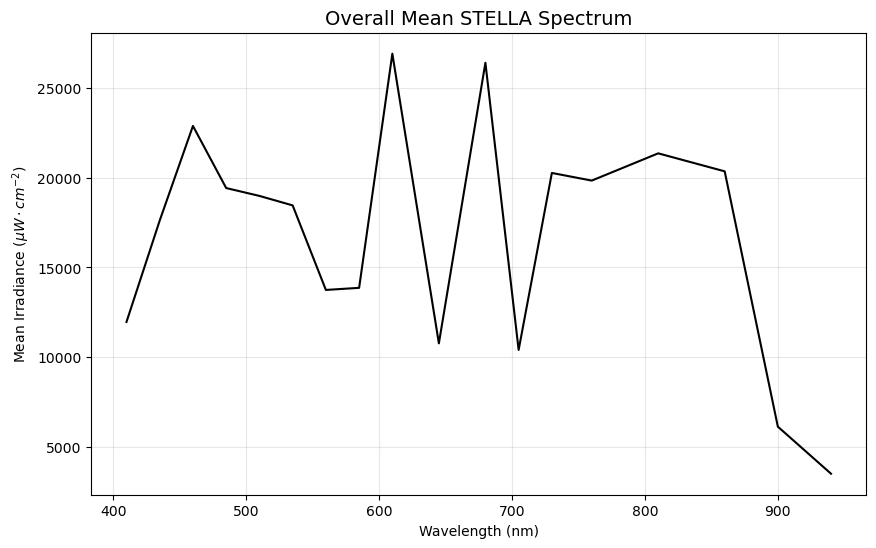

In [14]:
overall_mean = (
    stella[stella['batch'] == 3]
    .groupby("wavelength_nm", as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)

plt.figure(figsize=(10,6))
plt.plot(
    overall_mean["wavelength_nm"],
    overall_mean["irradiance_uw.per.cm.sq_factory_cal"],
    color="black"
)
plt.title("Overall Mean STELLA Spectrum", fontsize=14)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Mean Irradiance ($\mu W \cdot cm^{-2}$)")
plt.grid(alpha=0.3)
plt.show()

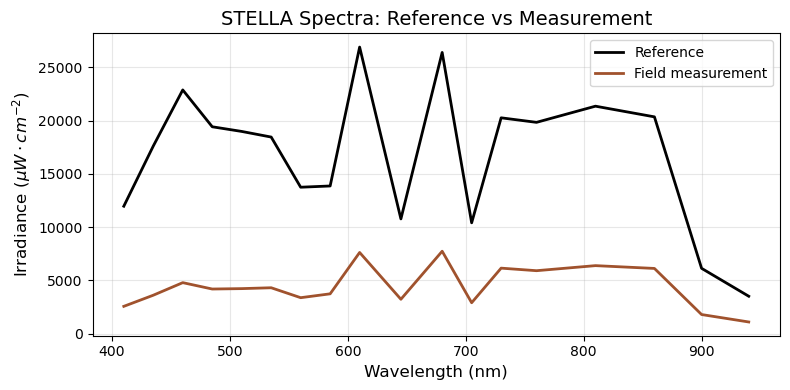

In [31]:
# Average spectra for batch 3 (white reference) and batch 5 (rocks)
white_ref = (
    stella[stella["batch"] == 3]
    .groupby("wavelength_nm", as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)
rocks = (
    stella[stella["batch"] == 6]
    .groupby("wavelength_nm", as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)

# Plot both on the same figure
plt.figure(figsize=(8,4))
plt.plot(
    white_ref["wavelength_nm"],
    white_ref["irradiance_uw.per.cm.sq_factory_cal"],
    color="black", lw=2, label="Reference"
)
plt.plot(
    rocks["wavelength_nm"],
    rocks["irradiance_uw.per.cm.sq_factory_cal"],
    color="sienna", lw=2, label="Field measurement"
)

plt.title("STELLA Spectra: Reference vs Measurement", fontsize=14)
plt.xlabel("Wavelength (nm)", fontsize=12)
plt.ylabel(r"Irradiance ($\mu W \cdot cm^{-2}$)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

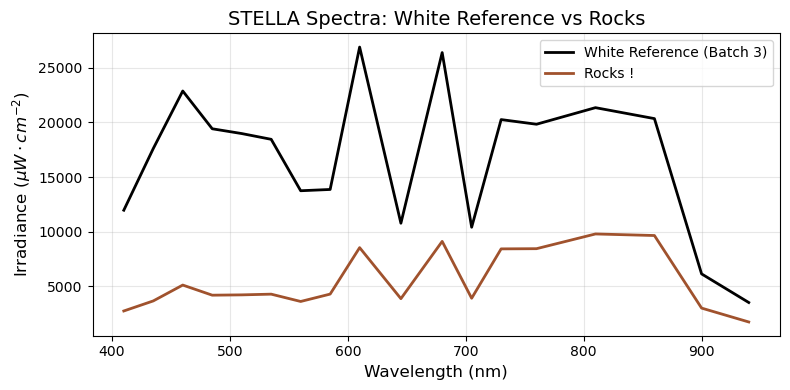

In [29]:
# Average spectra for batch 3 (white reference) and batch 5 (rocks)
white_ref = (
    stella[stella["batch"] == 3]
    .groupby("wavelength_nm", as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)
rocks = (
    stella[stella["batch"] == 8]
    .groupby("wavelength_nm", as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)

# Plot both on the same figure
plt.figure(figsize=(8,4))
plt.plot(
    white_ref["wavelength_nm"],
    white_ref["irradiance_uw.per.cm.sq_factory_cal"],
    color="black", lw=2, label="White Reference (Batch 3)"
)
plt.plot(
    rocks["wavelength_nm"],
    rocks["irradiance_uw.per.cm.sq_factory_cal"],
    color="sienna", lw=2, label="Rocks !"
)

plt.title("STELLA Spectra: White Reference vs Rocks", fontsize=14)
plt.xlabel("Wavelength (nm)", fontsize=12)
plt.ylabel(r"Irradiance ($\mu W \cdot cm^{-2}$)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

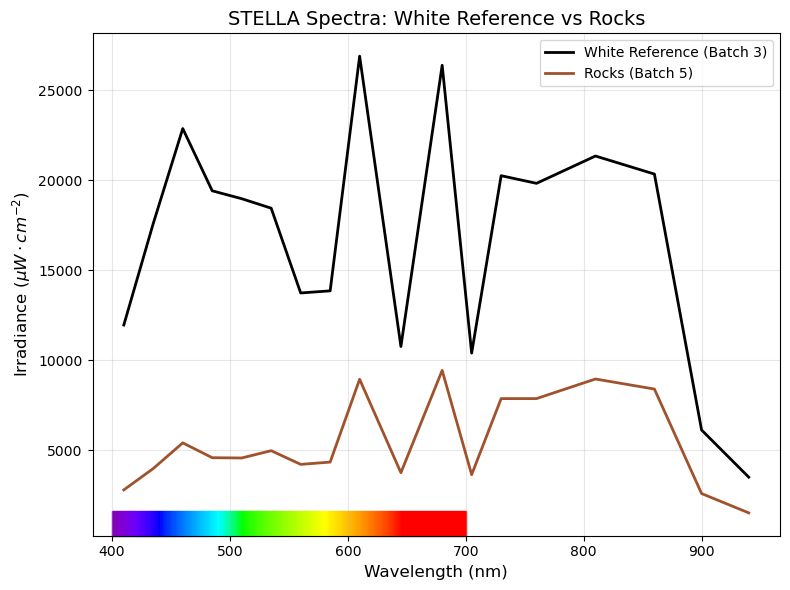

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Average spectra for white reference and rocks
white_ref = (
    stella[stella["batch"] == 3]
    .groupby("wavelength_nm", as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)
rocks = (
    stella[stella["batch"] == 12]
    .groupby("wavelength_nm", as_index=False)
    ["irradiance_uw.per.cm.sq_factory_cal"].mean()
)

# Plot spectra
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(
    white_ref["wavelength_nm"],
    white_ref["irradiance_uw.per.cm.sq_factory_cal"],
    color="black", lw=2, label="White Reference (Batch 3)"
)
ax.plot(
    rocks["wavelength_nm"],
    rocks["irradiance_uw.per.cm.sq_factory_cal"],
    color="sienna", lw=2, label="Rocks (Batch 5)"
)

ax.set_title("STELLA Spectra: White Reference vs Rocks", fontsize=14)
ax.set_xlabel("Wavelength (nm)", fontsize=12)
ax.set_ylabel(r"Irradiance ($\mu W \cdot cm^{-2}$)", fontsize=12)
ax.legend()
ax.grid(alpha=0.3)

# --- Add visible spectrum swatch (400–700 nm) ---
# Define the visible wavelength range
vis_start, vis_end = 400, 700
wavelengths = np.linspace(vis_start, vis_end, 500)

# Convert wavelength to RGB using a simple approximation
# (there are better colormaps, but this works for visualization)
def wavelength_to_rgb(wavelength):
    """Approximate RGB for a wavelength in nm (400–700)."""
    import colorsys
    gamma = 0.8
    intensity_max = 255
    if wavelength < 380 or wavelength > 780:
        return (0, 0, 0)
    if wavelength < 440:
        R = -(wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif wavelength < 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif wavelength < 510:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510) / (510 - 490)
    elif wavelength < 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif wavelength < 645:
        R = 1.0
        G = -(wavelength - 645) / (645 - 580)
        B = 0.0
    else:
        R = 1.0
        G = 0.0
        B = 0.0
    # Intensity correction
    factor = 1.0
    if wavelength > 700:
        factor = 0.3 + 0.7*(780 - wavelength)/(80.0)
    elif wavelength < 420:
        factor = 0.3 + 0.7*(wavelength - 380)/(40.0)
    R = (R * factor)**gamma
    G = (G * factor)**gamma
    B = (B * factor)**gamma
    return (R, G, B)

# Build color swatch
for wl in range(vis_start, vis_end):
    ax.add_patch(
        patches.Rectangle(
            (wl, ax.get_ylim()[0]),   # bottom-left corner
            1,                        # width in nm
            (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05,  # small height (5% of y axis)
            color=wavelength_to_rgb(wl),
            transform=ax.transData,
            clip_on=False
        )
    )

plt.tight_layout()
plt.show()